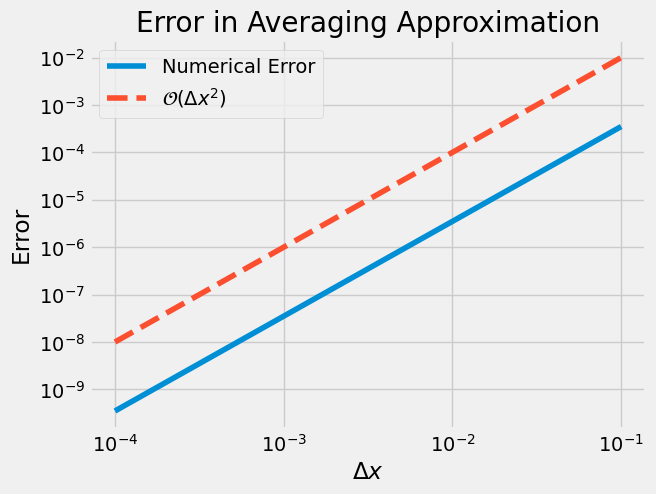

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Function and its derivatives
def f(x): return np.sin(x)
def f_double_prime(x): return -np.sin(x)

# Parameters
xi = 1.0
dx_values = np.logspace(-4, -1, 50)
errors = []

for dx in dx_values:
    a, b = xi - dx/2, xi + dx/2
    avg = (1/dx) * quad(f, a, b)[0]
    approx = f(xi)
    error = abs(avg - approx)
    errors.append(error)

# Plot the error vs dx
plt.style.use("fivethirtyeight")
plt.loglog(dx_values, errors, label="Numerical Error")
plt.loglog(dx_values, [dx**2 for dx in dx_values], '--', label=r"$\mathcal{O}(\Delta x^2)$")
plt.xlabel(r"$\Delta x$")
plt.ylabel("Error")
plt.title("Error in Averaging Approximation")
plt.legend()
plt.grid(True)
plt.show()


Defines the test function 
𝑓
(
𝑥
)
=
sin
⁡
(
𝑥
)
f(x)=sin(x)

Its second derivative 
𝑓
′
′
(
𝑥
)
=
−
sin
⁡
(
𝑥
)
f 
′′
 (x)=−sin(x), though not used here, is helpful for analytical checks.

Picks a central point 
𝑥
𝑖
=
1.0
x 
i
​
 =1.0

Generates 50 values of 
Δ
𝑥
Δx from 
10
−
4
10 
−4
  to 
10
−
1
10 
−1
  on a logarithmic scale

Initializes an empty list to store errors.

Inside the loop for each 
Δ
𝑥
Δx:

a, b: Define integration limits centered around 
𝑥
𝑖
x 
i
​
 

quad(f, a, b)[0]: Numerically integrate 
𝑓
(
𝑥
)
f(x) over 
[
𝑎
,
𝑏
]
[a,b]

Divide by 
Δ
𝑥
Δx to get the average (i.e., implement Eq. 3.3)

Compare the result to 
𝑓
(
𝑥
𝑖
)
f(x 
i
​
 )

Compute absolute error and store it.

Plots the errors in log-log scale.

Adds a reference line 
∼
Δ
𝑥
2
∼Δx 
2
  to visually confirm second-order convergence.

The slope of the error line should match that reference if the method is 
𝑂
(
Δ
𝑥
2
)
O(Δx 
2
 ).

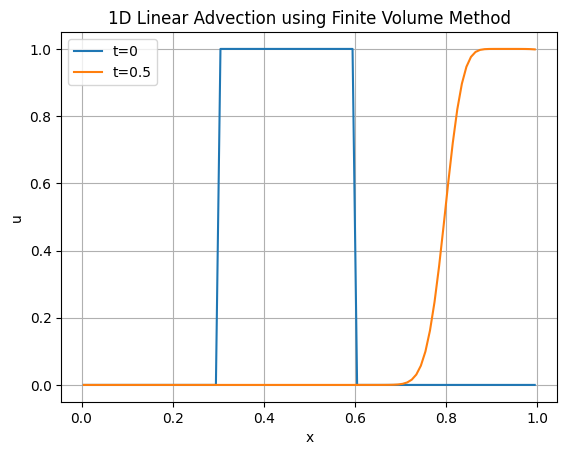

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1.0               # Advection speed
L = 1.0               # Domain length
Nx = 100              # Number of cells
dx = L / Nx           # Cell width
x = np.linspace(dx/2, L - dx/2, Nx)  # Cell centers
CFL = 0.8             # Courant number (for stability)
dt = CFL * dx / a     # Time step from CFL condition
T = 0.5               # Final time
Nt = int(T / dt)      # Number of time steps

# Initial condition: square wave
def u0(x):
    return np.where((x > 0.3) & (x < 0.6), 1.0, 0.0)

# Initialize
u = u0(x)

# Plot initial condition
plt.plot(x, u, label='t=0')

# Finite Volume Time Loop (1st-order upwind)
for n in range(Nt):
    u_next = u.copy()
    for i in range(1, Nx):
        flux_left = a * u[i-1]  # upwind value at left face
        flux_right = a * u[i]   # upwind value at right face
        u_next[i] -= (dt/dx) * (flux_right - flux_left)
    u = u_next

# Plot final result
plt.plot(x, u, label=f't={T}')
plt.xlabel("x")
plt.ylabel("u")
plt.title("1D Linear Advection using Finite Volume Method")
plt.legend()
plt.grid(True)
plt.show()


ValueError: operands could not be broadcast together with shapes (100,) (101,) 

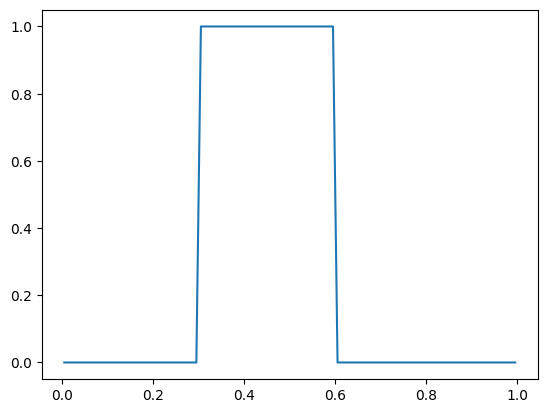

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1.0                 # Advection speed
L = 1.0                 # Domain length
Nx = 100                # Number of cells
dx = L / Nx             # Cell width
x = np.linspace(dx/2, L - dx/2, Nx)  # Cell centers
CFL = 0.8
dt = CFL * dx / a
T = 0.5
Nt = int(T / dt)

# Initial condition
def u0(x):
    return np.where((x > 0.3) & (x < 0.6), 1.0, 0.0)

# Flux function (upwind for a > 0)
def compute_flux(u):
    flux = np.zeros_like(u)
    flux[1:] = a * u[:-1]
    flux[0] = a * u[0]  # periodic BC or Dirichlet
    return flux

# RHS of semi-discrete form du/dt = - (F_right - F_left) / dx
def rhs(u):
    flux = compute_flux(u)
    return -(flux[1:] - flux[:-1]) / dx

# Apply periodic BC to u
def apply_periodic(u):
    u_ext = np.zeros(Nx + 2)
    u_ext[1:-1] = u
    u_ext[0] = u[-1]
    u_ext[-1] = u[0]
    return u_ext

# Initialize
u = u0(x)
plt.plot(x, u, label='t=0')

# Time loop with RK4
for n in range(Nt):
    u_ext = apply_periodic(u)
    
    k1 = rhs(u_ext)
    k2 = rhs(apply_periodic(u + 0.5 * dt * k1))
    k3 = rhs(apply_periodic(u + 0.5 * dt * k2))
    k4 = rhs(apply_periodic(u + dt * k3))
    
    u += (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

# Plot final result
plt.plot(x, u, label=f't={T}')
plt.xlabel("x")
plt.ylabel("u")
plt.title("Advection Equation: RK4 Time Stepping")
plt.legend()
plt.grid(True)
plt.show()


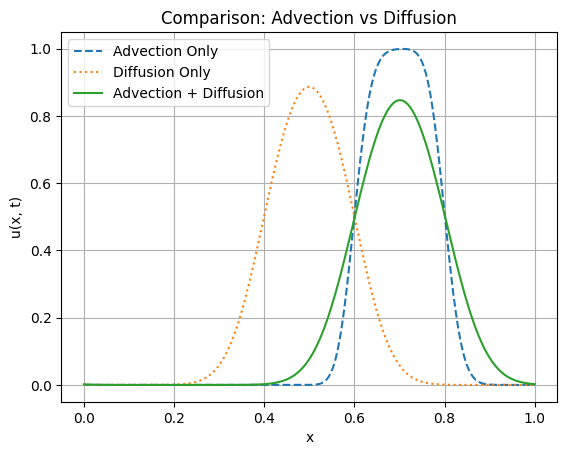

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
L = 1.0        # domain length
Nx = 200       # number of spatial points
dx = L / Nx
x = np.linspace(0, L, Nx)
T = 0.2        # final time
dt = 0.0005    # time step
Nt = int(T / dt)

# Physical parameters
a = 1.0        # advection speed
D = 0.01       # diffusion coefficient

# Initial condition: pulse in the middle
def initial_pulse(x):
    return np.where((x > 0.4) & (x < 0.6), 1.0, 0.0)

# Apply periodic boundary conditions
def periodic(u):
    u[0] = u[-2]
    u[-1] = u[1]
    return u

# Finite difference time step
def step_advection(u):
    u = periodic(u.copy())
    return u[1:-1] - a * dt / dx * (u[1:-1] - u[0:-2])

def step_diffusion(u):
    u = periodic(u.copy())
    return u[1:-1] + D * dt / dx**2 * (u[2:] - 2*u[1:-1] + u[0:-2])

def step_advdiff(u):
    u = periodic(u.copy())
    advection = - a * (u[1:-1] - u[0:-2]) / dx
    diffusion = D * (u[2:] - 2*u[1:-1] + u[0:-2]) / dx**2
    return u[1:-1] + dt * (advection + diffusion)

# Initialize
u_adv = initial_pulse(x)
u_dif = u_adv.copy()
u_both = u_adv.copy()

# Extend arrays for periodic boundaries
u_adv = np.pad(u_adv, (1, 1), mode='wrap')
u_dif = np.pad(u_dif, (1, 1), mode='wrap')
u_both = np.pad(u_both, (1, 1), mode='wrap')

# Time stepping
for _ in range(Nt):
    u_adv[1:-1] = step_advection(u_adv)
    u_dif[1:-1] = step_diffusion(u_dif)
    u_both[1:-1] = step_advdiff(u_both)

# Plot results
plt.plot(x, u_adv[1:-1], label="Advection Only", linestyle="--")
plt.plot(x, u_dif[1:-1], label="Diffusion Only", linestyle=":")
plt.plot(x, u_both[1:-1], label="Advection + Diffusion")
plt.title("Comparison: Advection vs Diffusion")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid(True)
plt.show()


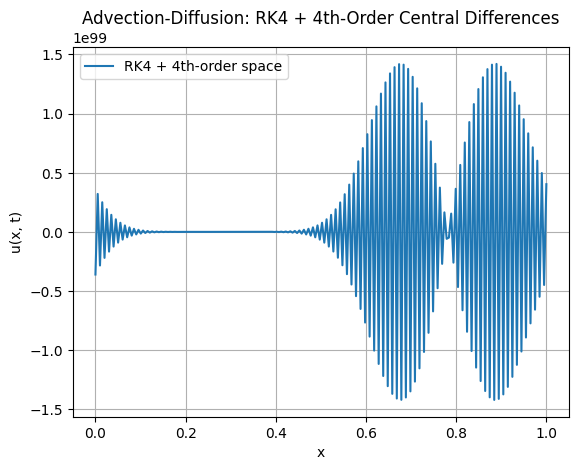

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0        # domain length
Nx = 200       # number of spatial points
dx = L / Nx
x = np.linspace(0, L, Nx)
T = 0.2        # final time
a = 1.0        # advection speed
D = 0.01       # diffusion coefficient
CFL = 0.5      # for stability
dt = CFL * dx / a
Nt = int(T / dt)

# Initial condition: square pulse
def initial_condition(x):
    return np.where((x > 0.4) & (x < 0.6), 1.0, 0.0)

# Periodic extension for 2 ghost cells on each side
def extend_periodic(u):
    return np.concatenate([u[-2:], u, u[:2]])

# 4th-order central difference: first derivative (advection)
def ddx_4th(u, dx):
    return (-u[4:] + 8*u[3:-1] - 8*u[1:-3] + u[0:-4]) / (12 * dx)

# 4th-order central difference: second derivative (diffusion)
def d2dx2_4th(u, dx):
    return (-u[4:] + 16*u[3:-1] - 30*u[2:-2] + 16*u[1:-3] - u[0:-4]) / (12 * dx**2)

# RHS of the PDE: du/dt = -a * du/dx + D * d²u/dx²
def rhs(u):
    u_ext = extend_periodic(u)
    dudx = ddx_4th(u_ext, dx)
    d2udx2 = d2dx2_4th(u_ext, dx)
    return -a * dudx + D * d2udx2

# RK4 time integrator
def rk4_step(u, dt):
    k1 = rhs(u)
    k2 = rhs(u + 0.5 * dt * k1)
    k3 = rhs(u + 0.5 * dt * k2)
    k4 = rhs(u + dt * k3)
    return u + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

# Initialize solution
u = initial_condition(x)

# Time loop
for _ in range(Nt):
    u = rk4_step(u, dt)

# Plot result
plt.plot(x, u, label='RK4 + 4th-order space')
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Advection-Diffusion: RK4 + 4th-Order Central Differences")
plt.grid(True)
plt.legend()
plt.show()
